In [2]:
import time
import tensorflow as tf
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import numpy as np
from numpy import newaxis
import matplotlib.pyplot as plt

Using TensorFlow backend.


Example from Training Data:


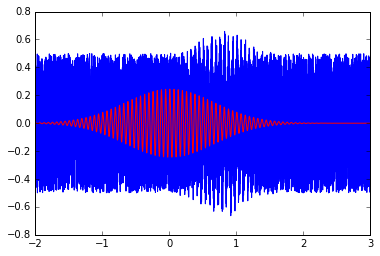

Example from Testing Data:


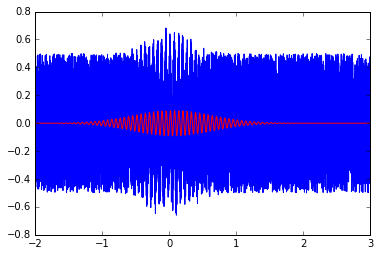

In [10]:
def myfunc(t):
    A = np.random.rand(1)
    B = np.random.rand(1)
    C = np.random.rand(1)
    D = 100 + np.random.rand(1)
    E = np.random.rand(1)
    F = 0 # having trouble shifting graph -- get exact values and plot on Desmos
    return (A * np.exp(-(np.square((t-F)-B))/(np.square(C))) * np.sin(D*t + E))
    
vfunc = np.vectorize(myfunc)

def noisy(y):
    noise = np.random.uniform(-0.5, 0.5, size=y.shape)
    # try reducing noise range, and try np.random.normal
    return y + noise

t = np.linspace(-2, 3, 8192)

# Generate training data
clean_data = []
noisy_data = []
for i in range(4500):
    clean_data.append(t)
    clean_data[i] = myfunc(clean_data[i])
    noisy_data.append(t)
    noisy_data[i] = noisy(clean_data[i])
    
print("Example from Training Data:")
plt.cla()
plt.plot(t, noisy_data[int(np.random.uniform(0, 4500))], "b-")
plt.plot(t, clean_data[int(np.random.uniform(0, 4500))], "r-")
plt.show()

# Generate test data
clean_data_test = []
noisy_data_test = []
for i in range(500):
    clean_data_test.append(t)
    clean_data_test[i] = myfunc(clean_data_test[i])
    noisy_data_test.append(t)
    noisy_data_test[i] = noisy(clean_data_test[i])

print("Example from Testing Data:")
plt.cla()
plt.plot(t, noisy_data_test[int(np.random.uniform(0, 500))], "b-")
plt.plot(t, clean_data_test[int(np.random.uniform(0, 500))], "r-")
plt.show()

x_train = np.asarray(noisy_data)
y_train = np.asarray(clean_data)
x_test = np.asarray(noisy_data_test)
y_test = np.asarray(clean_data_test)

# Adding an extra dimension as Keras LSTM layers take in a NumPy array of 3 dimensions
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [3]:
def build_model(layers):
    # here layers is a list with 4 elements
    
    model = Sequential()
    
    model.add(LSTM(
        input_dim = layers[0],
        output_dim = layers[1],
        return_sequences = True))
    model.add(Dropout(0.2))
    
    model.add(LSTM(
        layers[2],
        return_sequences = False))
    model.add(Dropout(0.2))
    
    model.add(Dense(
        output_dim = layers[3]))
    model.add(Activation("linear"))
    
    model.compile(loss="mse", optimizer="rmsprop")
    
    # try changing whether there is dropout, activation function, loss function, number of layers, in/out of layers
    
    return model

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(units=50, return_sequences=True, input_shape=(None, 1))`
  if __name__ == '__main__':
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=8192)`


Train on 4275 samples, validate on 225 samples
Epoch 1/5
4275/4275 [==============================] - 1244s 291ms/step - loss: 0.0137 - val_loss: 0.0135
Epoch 2/5
4275/4275 [==============================] - 1244s 291ms/step - loss: 0.0121 - val_loss: 0.0136
Epoch 3/5
4275/4275 [==============================] - 1243s 291ms/step - loss: 0.0120 - val_loss: 0.0136
Epoch 4/5
4275/4275 [==============================] - 1243s 291ms/step - loss: 0.0120 - val_loss: 0.0136
Epoch 5/5
4275/4275 [==============================] - 1236s 289ms/step - loss: 0.0120 - val_loss: 0.0147
8192


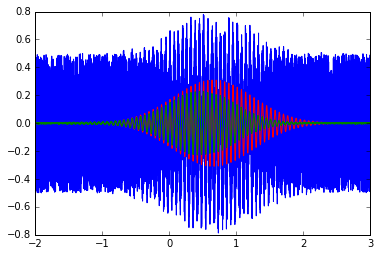

('Training duration (min) : ', 105.35097913344701)


In [8]:
epochs = 5
global_start_time = time.time()

model = build_model([1, 50, 100, 8192])

model.fit(x_train,
          y_train,
          batch_size=128,
          nb_epoch=epochs,
          validation_split=0.05)

predicted = model.predict(x_test)
print(len(predicted[0]))

plt.cla()
plt.plot(t, x_test[0], "b-")
plt.plot(t, y_test[0], "r-")
plt.plot(t, predicted[0], "g-")
plt.show()

print('Training duration (min) : ', (time.time() - global_start_time)/60)